In [18]:
from Environments.RandomWalk import make_random_walk, estimate_goal_probability
from Environments.FrozenLake import make_frozen_lake

from Sarsa.ExpectedSarsa import ExpectedSarsaCV
from TD.TDZero import TDZeroCV
from TD.TDZeroReplay import TDZeroReplayCV
from TrueTD.TrueOnlineTDLambda import TrueOnlineTDLambdaCV
from TrueTD.TrueOnlineTDLambdaReplay import TrueOnlineTDLambdaReplayCV


### Environments Estimated MC Success Rate

In [2]:
frozen_lake = make_frozen_lake()
random_walk = make_random_walk()

In [3]:
print("Random Walk")
estimate_goal_probability(random_walk)

print("Frozen Lake")
estimate_goal_probability(frozen_lake)

Random Walk
Estimated probability of reaching the goal: 0.1953
Frozen Lake
Estimated probability of reaching the goal: 0.0139


### TD(0) + Random Walk

Number of permutations: 1
Alpha values: [0.003]
Gamma values: [0.7]
Alpha: 0.0030, Gamma: 0.7000, Avg Success: 25.20%, Avg Rewards: 0.24
Top 5 Results:
Run 1: {'alpha': 0.003, 'gamma': 0.7}, Avg Success: 25.20%, Avg Rewards: 0.24


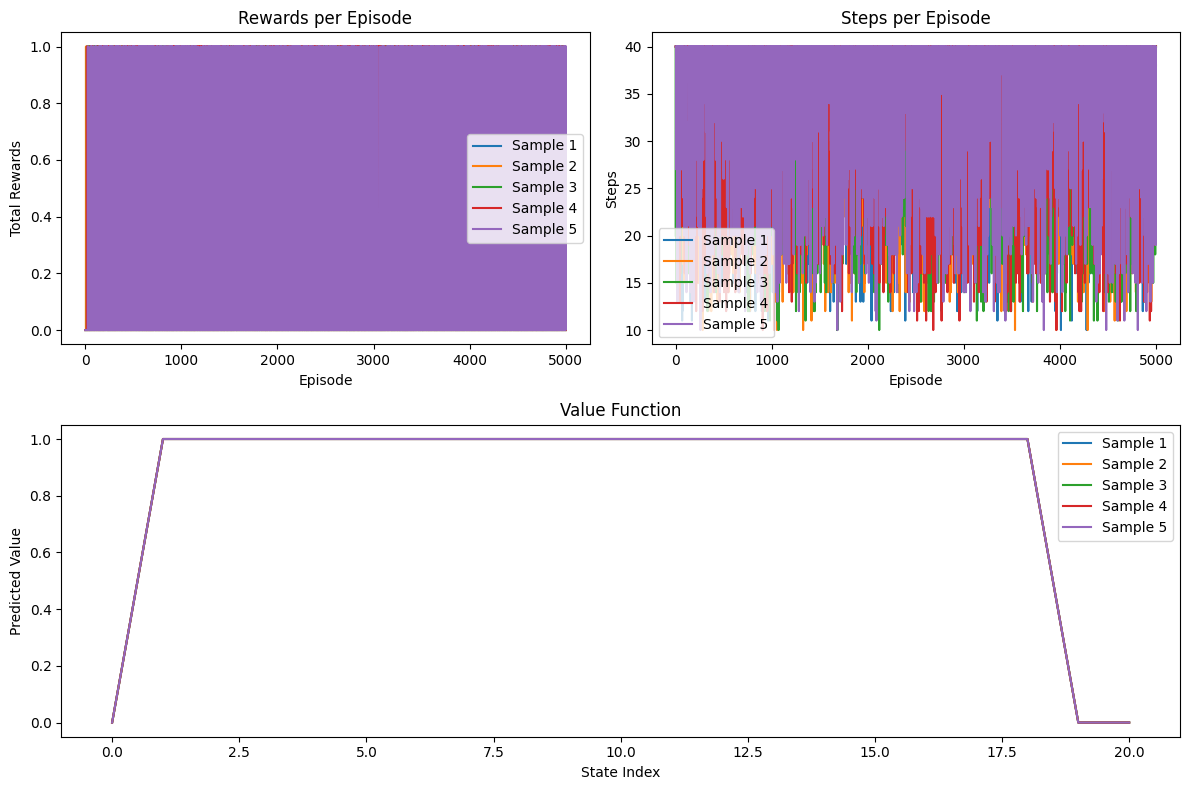

In [4]:
# Best results: alpha=0.003, gamma=0.7
cv = TDZeroCV(random_walk, {"alpha": [0.003], "gamma": [0.7]})
cv.search(episodes=5000)
cv.summary()
cv.plot_metrics()

### TD(0) + Frozen Lake

Number of permutations: 1
Alpha values: [0.003]
Gamma values: [0.2]
Alpha: 0.0030, Gamma: 0.2000, Avg Success: 100.00%, Avg Rewards: 1.00
Top 5 Results:
Run 1: {'alpha': 0.003, 'gamma': 0.2}, Avg Success: 100.00%, Avg Rewards: 1.00


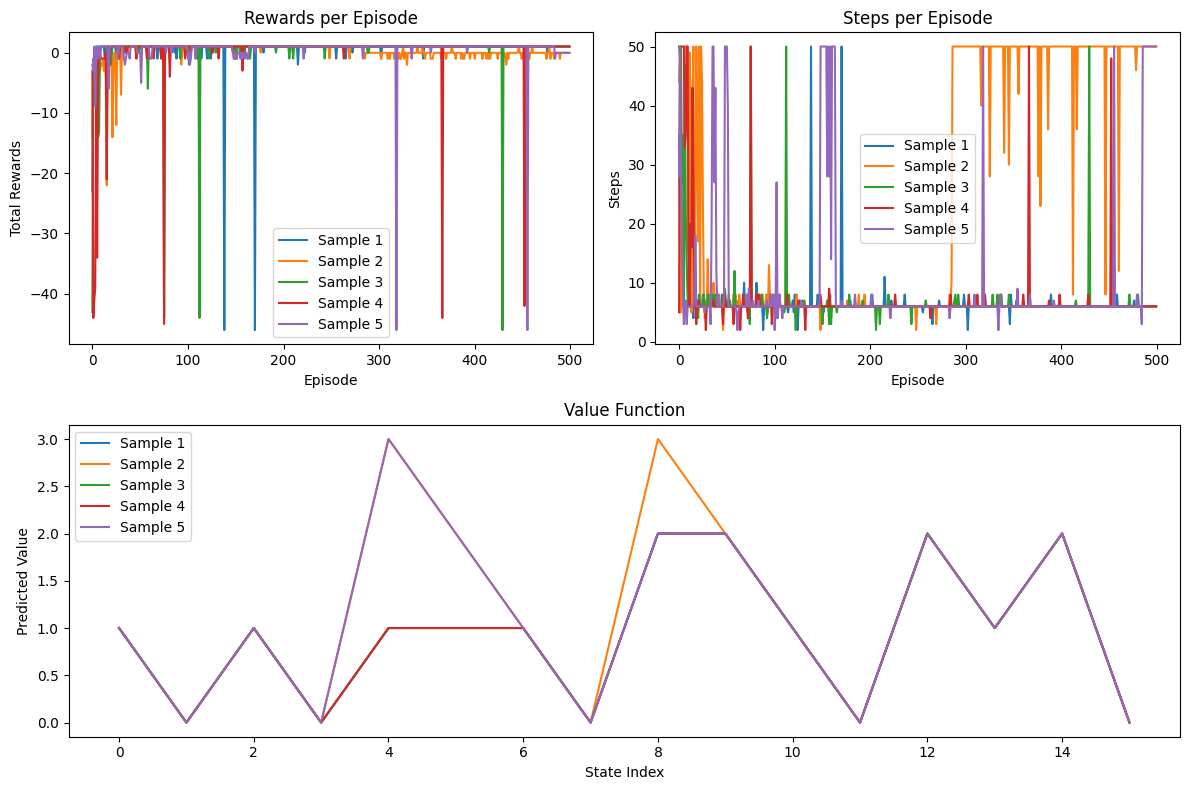

In [5]:
# Best alpha=0.003, gamma=0.2
cv = TDZeroCV(frozen_lake, {"alpha": [0.003], "gamma": [0.2]})
cv.search(episodes=500)
cv.summary()
cv.plot_metrics()

### TD(0)-Replay + Random Walk

Number of permutations: 1
Alpha values: [0.005]
Gamma values: [1.0]


/home/dach/dev/temporal-difference/TD/TDZeroReplay.py:39: RuntimeWarning: overflow encountered in multiply
  replay_update = td_error * np.dot(self.eligibility_matrix, phi)
/home/dach/dev/temporal-difference/TD/TDZeroReplay.py:39: RuntimeWarning: invalid value encountered in multiply
  replay_update = td_error * np.dot(self.eligibility_matrix, phi)
/home/dach/dev/temporal-difference/TD/TDZeroReplay.py:43: RuntimeWarning: invalid value encountered in add
  self.value_table[visited_indices] += self.alpha * replay_update[visited_indices]


Alpha: 0.0050, Gamma: 1.0000, Avg Success: 29.00%, Avg Rewards: 0.03
Top 5 Results:
Run 1: {'alpha': 0.005, 'gamma': 1.0}, Avg Success: 29.00%, Avg Rewards: 0.03


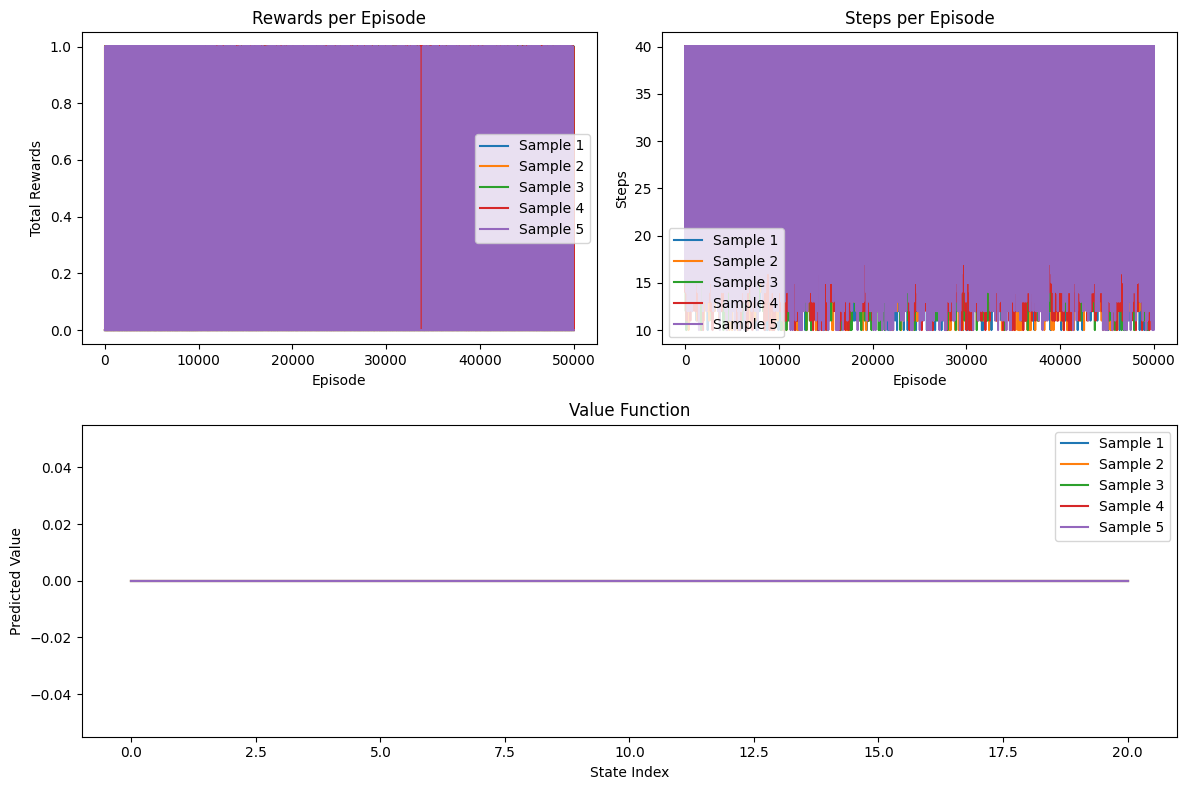

In [15]:
# Best results: alpha=0.005, gamma=1.0
cv = TDZeroReplayCV(random_walk, {"alpha": [0.005], "gamma": [1.0]})
cv.search(episodes=50000)
cv.summary()
cv.plot_metrics()

### TD(0)-Replay + Frozen Lake

Number of permutations: 1
Alpha values: [0.002]
Gamma values: [0.6]
Alpha: 0.0020, Gamma: 0.6000, Avg Success: 100.00%, Avg Rewards: 1.00
Top 5 Results:
Run 1: {'alpha': 0.002, 'gamma': 0.6}, Avg Success: 100.00%, Avg Rewards: 1.00


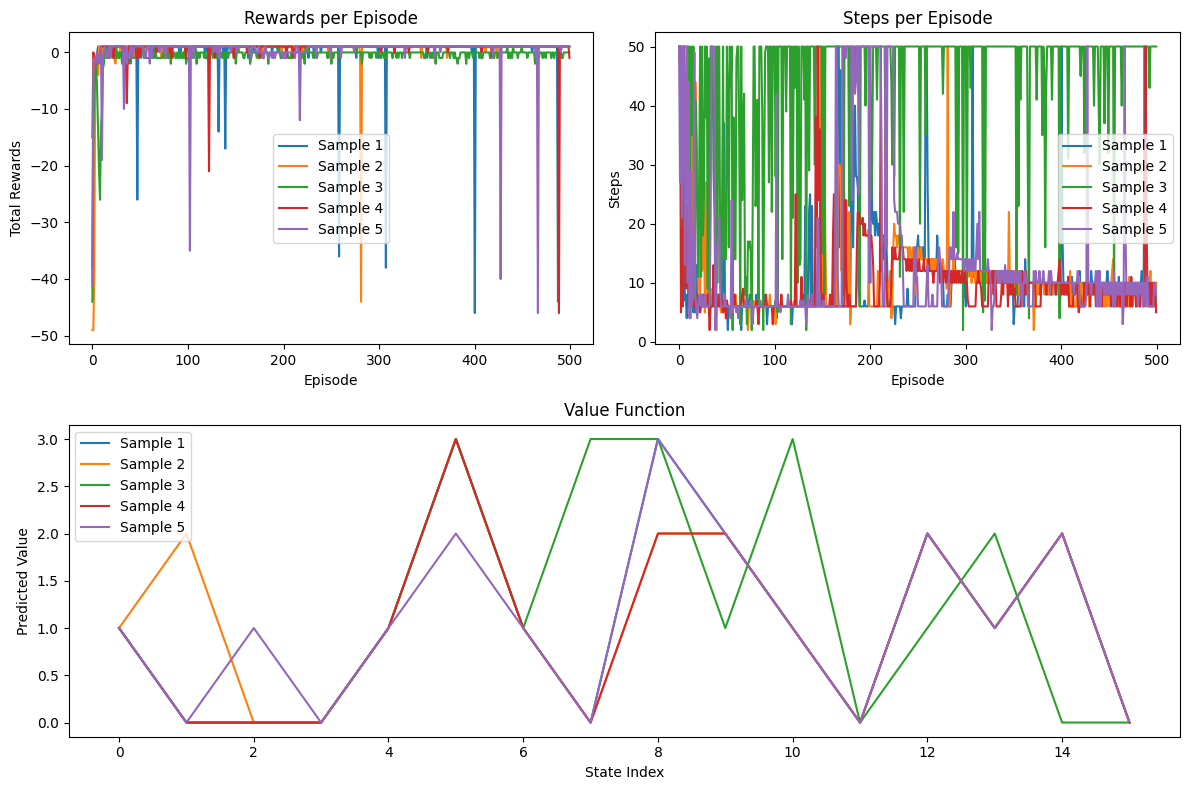

In [13]:
# Best alpha=0.002, gamma=0.6
cv = TDZeroReplayCV(frozen_lake, {"alpha": [0.002], "gamma": [0.6]})
cv.search(episodes=500)
cv.summary()
cv.plot_metrics()

### Expected Sarsa + Random Walk

Testing params: alpha=0.01, epsilon=2.0, decay_rate=0.99, gamma=0.95, Success rate: 27.71%
Top 5 results:
alpha=0.01, epsilon=2.0, decay_rate=0.99, gamma=0.95, success_rate=27.71%


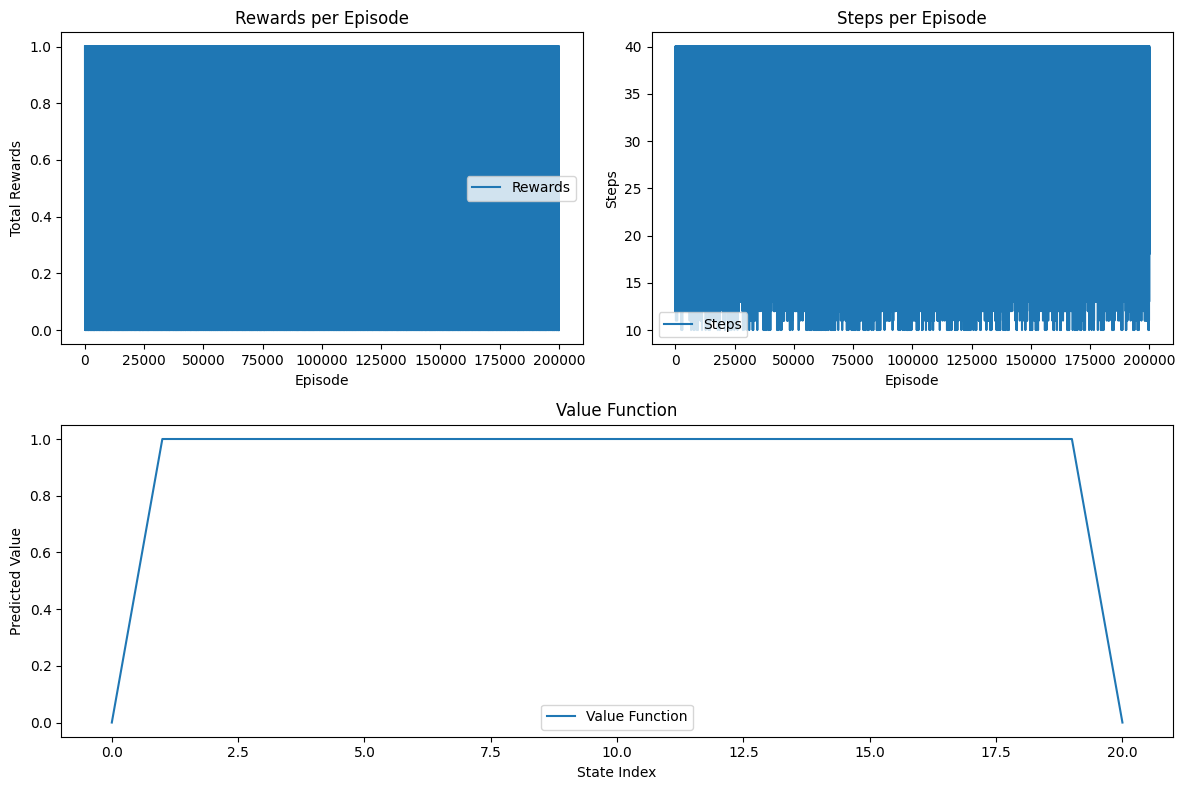

In [6]:
# Best alpha=0.01, epsilon=2.0, decay_rate=0.99, gamma=0.95
random_walk = make_random_walk()
cv = ExpectedSarsaCV(random_walk, { "alpha": [0.01], "epsilon": [2.0], "decay_rate": [0.99], "gamma": [0.95] })
cv.search(episodes=200000)
cv.summary()
cv.plot_metrics()

### Expected Sarsa + Frozen Lake

Testing params: alpha=0.01, epsilon=0.5, decay_rate=0.5, gamma=0.01, Success rate: 100.00%
Top 5 results:
alpha=0.01, epsilon=0.5, decay_rate=0.5, gamma=0.01, success_rate=100.00%


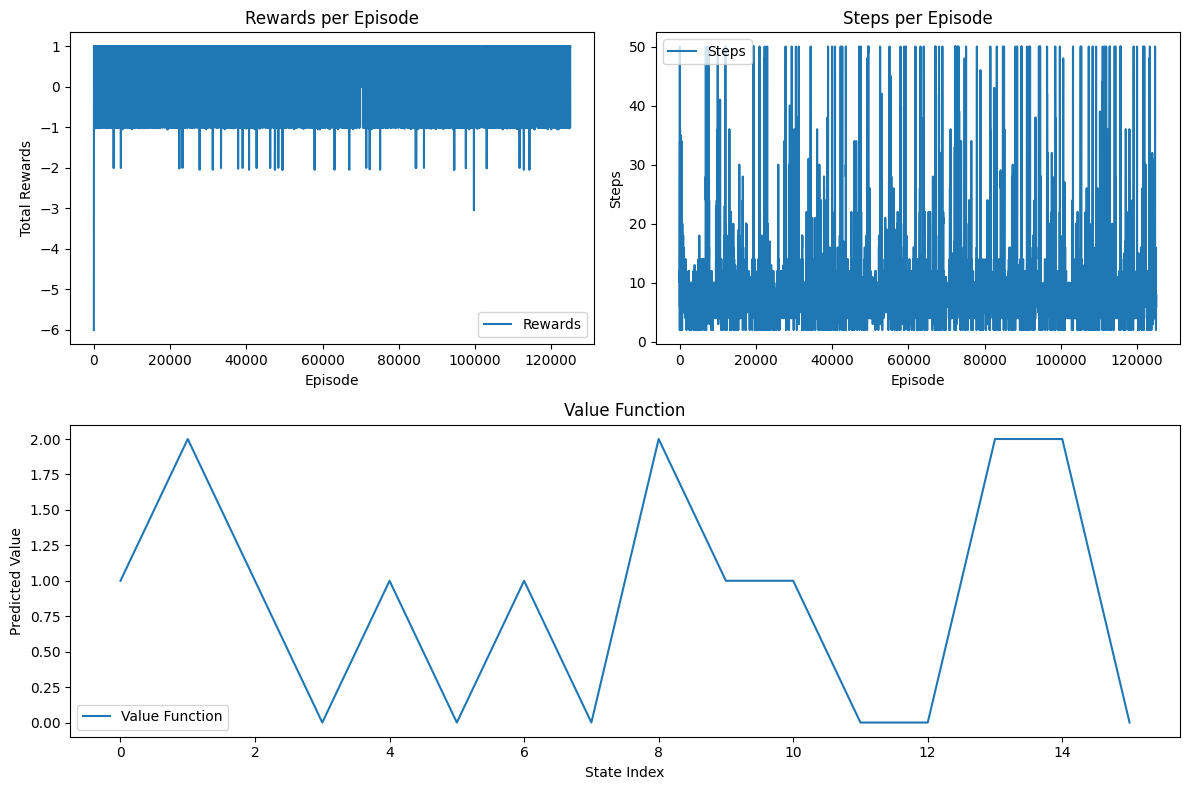

In [7]:
# Best alpha=0.01, epsilon=0.5, decay_rate=0.5, gamma=0.01
cv = ExpectedSarsaCV(frozen_lake, { "alpha": [0.01], "epsilon": [0.5], "decay_rate": [0.5], "gamma": [0.01] })
cv.search(episodes=125000)
cv.summary()
cv.plot_metrics()

### TrueOnlineTD(λ) + Random Walk

Number of permutations: 1
Alpha values: [0.01]
Gamma values: [0.9]
Alpha: 0.0100, Gamma: 0.9000, Avg Success: 25.00%, Avg Rewards: 0.03
Top 5 Results:
Run 1: {'alpha': 0.01, 'gamma': 0.9, 'lambd': 0.5}, Avg Success: 25.00%, Avg Rewards: 0.03


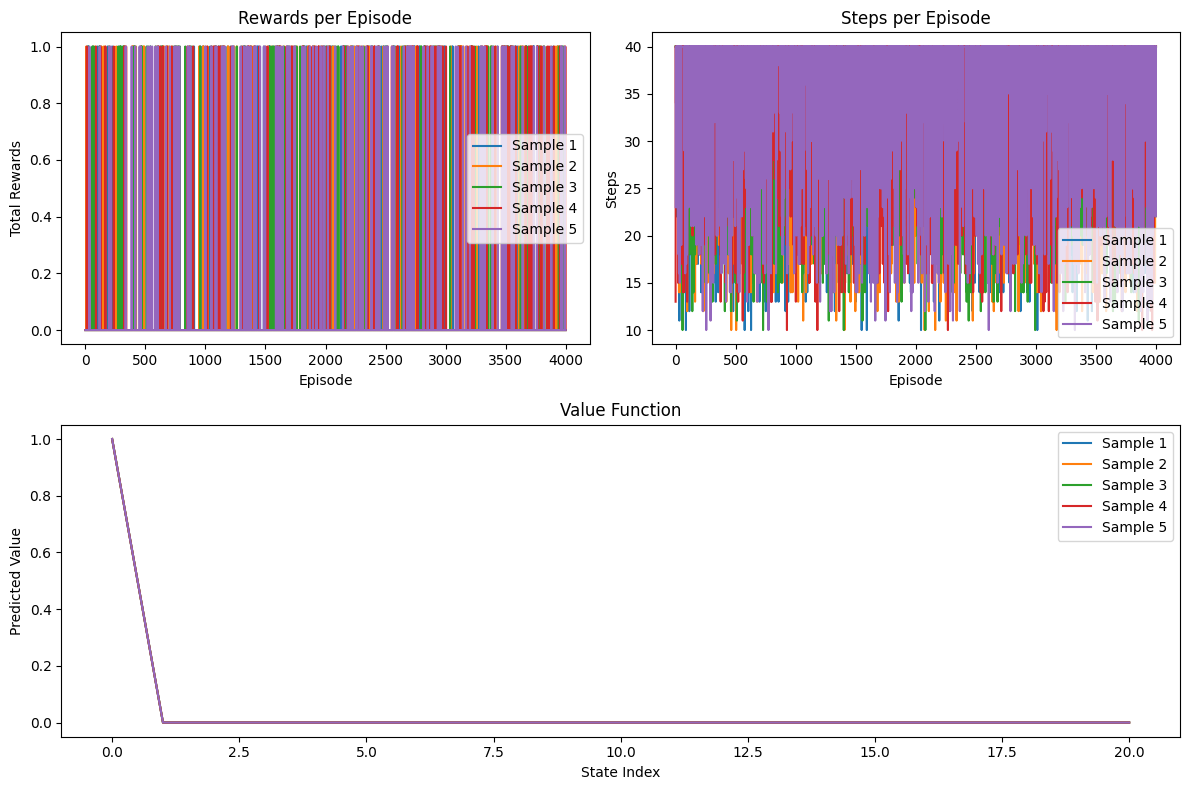

In [8]:
cv = TrueOnlineTDLambdaCV(random_walk, {"alpha": [0.01],"gamma": [0.9],"lambd": [0.5]  })
cv.search()
cv.summary()
cv.plot_metrics()

### TrueOnlineTD(λ) + Frozen Lake

Number of permutations: 1
Alpha values: [0.01]
Gamma values: [0.9]
Alpha: 0.0100, Gamma: 0.9000, Avg Success: 0.00%, Avg Rewards: -1.00
Top 5 Results:
Run 1: {'alpha': 0.01, 'gamma': 0.9, 'lambd': 0.5}, Avg Success: 0.00%, Avg Rewards: -1.00


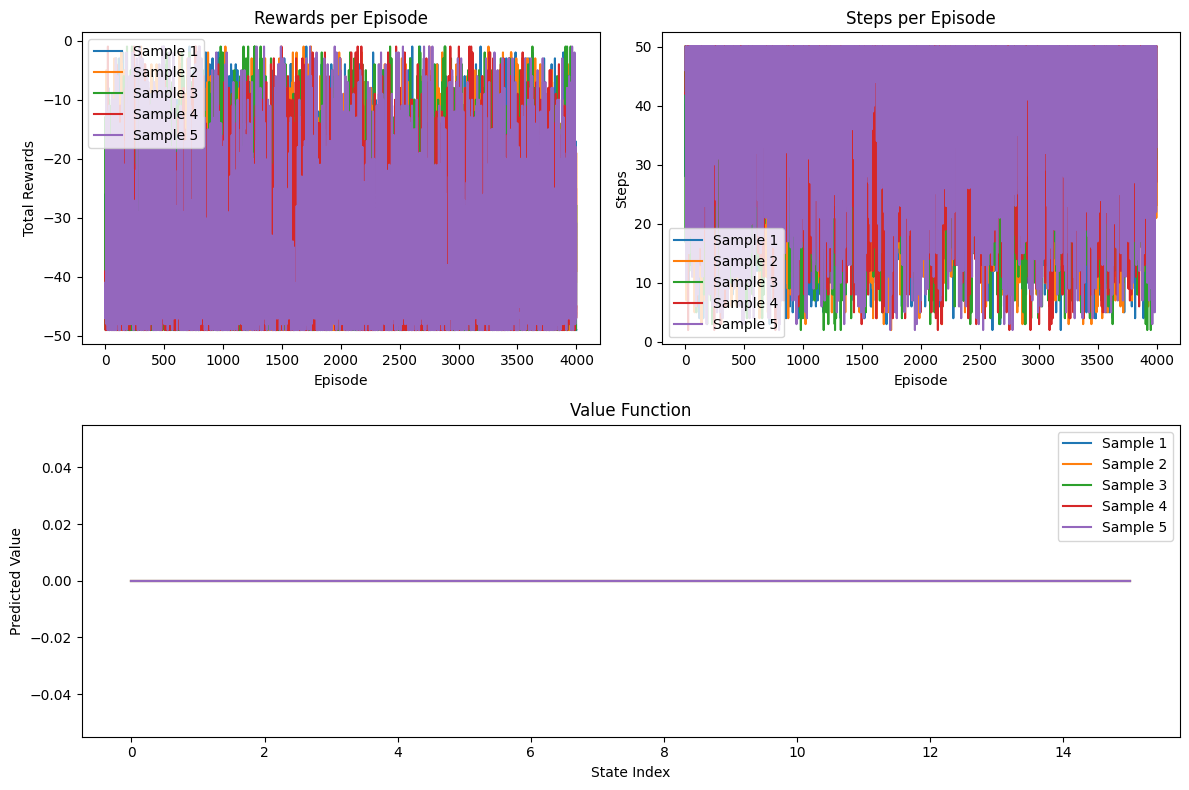

In [9]:
cv = TrueOnlineTDLambdaCV(frozen_lake, {"alpha": [0.01],"gamma": [0.9],"lambd": [0.5]  })
cv.search()
cv.summary()
cv.plot_metrics()

### TrueOnlineTD(λ)-Replay + Random Walk

Number of permutations: 1
Alpha values: [0.01]
Gamma values: [0.9]
Alpha: 0.0100, Gamma: 0.9000, Avg Success: 26.50%, Avg Rewards: 0.03
Top 5 Results:
Run 1: {'alpha': 0.01, 'gamma': 0.9, 'lambd': 0.5}, Avg Success: 26.50%, Avg Rewards: 0.03


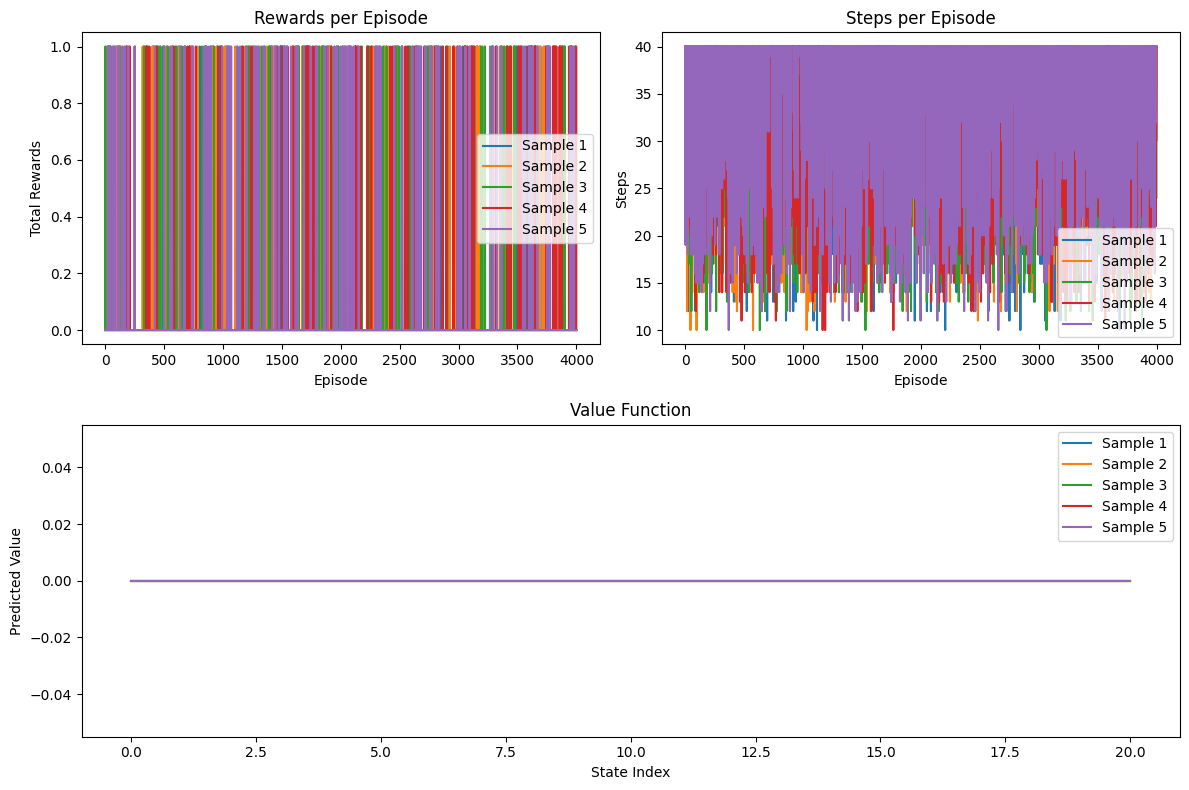

In [19]:
cv = TrueOnlineTDLambdaReplayCV(random_walk, {"alpha": [0.01],"gamma": [0.9],"lambd": [0.5]  })
cv.search()
cv.summary()
cv.plot_metrics()

### TrueOnlineTD(λ)-Replay + Frozen Lake

Number of permutations: 1
Alpha values: [0.01]
Gamma values: [0.9]
Alpha: 0.0100, Gamma: 0.9000, Avg Success: 0.00%, Avg Rewards: -1.00
Top 5 Results:
Run 1: {'alpha': 0.01, 'gamma': 0.9, 'lambd': 0.5}, Avg Success: 0.00%, Avg Rewards: -1.00


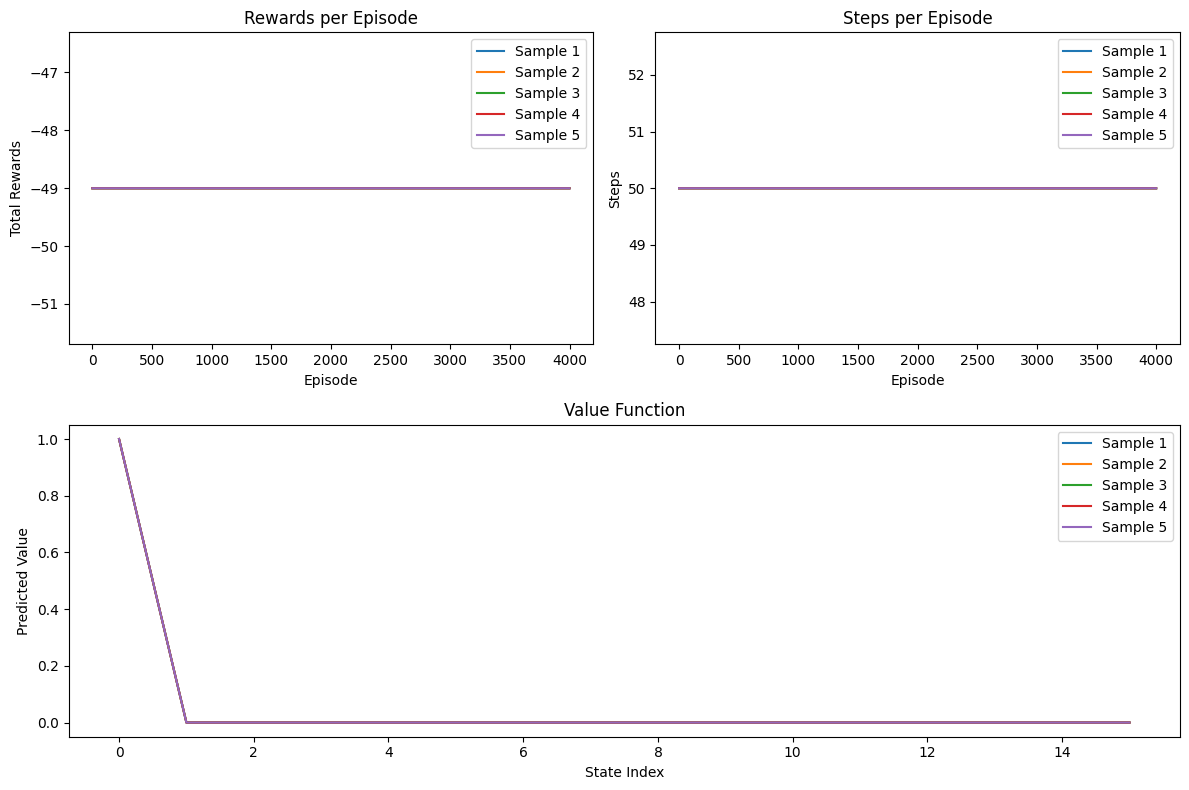

In [20]:
cv = TrueOnlineTDLambdaReplayCV(frozen_lake, {"alpha": [0.01],"gamma": [0.9],"lambd": [0.5]  })
cv.search()
cv.summary()
cv.plot_metrics()